In [1]:
import numpy as np
import pandas as pd
import healpy as hp
import astropy.coordinates as coord
from astropy import units as u
import math
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

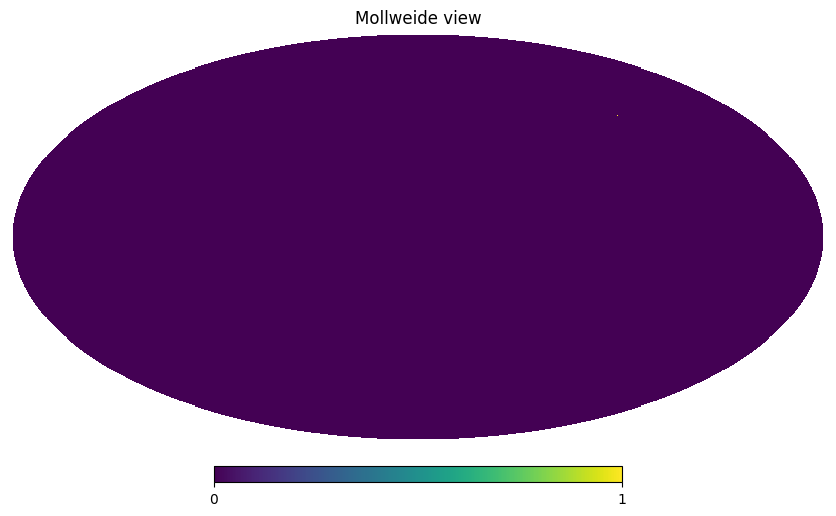

In [21]:
nside = 1024
map_test = np.zeros(hp.nside2npix(nside))

# First PS
lon_PS_1 = 250.090618
lat_PS_1 = 46.079678
pix_1 = hp.ang2pix(nside, lon_PS_1, lat_PS_1, lonlat = True)
map_test[pix_1] = 1

# Second PS
lon_PS_2 =249.471463
lat_PS_2 = 45.623714
pix_2 = hp.ang2pix(nside, lon_PS_2, lat_PS_2, lonlat = True)
map_test[pix_2] = 1

# Third PS
lon_PS_3 = 298.910256
lat_PS_3 = 57.494709
pix_3 = hp.ang2pix(nside, lon_PS_3, lat_PS_3, lonlat = True)
map_test[pix_3] = 1

hp.mollview(map_test)

In [22]:
lon_PS_obs = [lon_PS_1, lon_PS_2, lon_PS_3]
lat_PS_obs = [lat_PS_1, lat_PS_2, lat_PS_3]

In [23]:
%store -r lon
%store -r lat
%store -r xsize

In [24]:
reso_test = hp.nside2resol(nside, arcmin=True)

In [25]:
patches_test_map = [hp.gnomview(map_test, rot=[lon[i], lat[i]], xsize = xsize, reso = reso_test, return_projected_map = True, no_plot = True) for i in range(len(lon))]

In [26]:
lon_rad = np.radians(lon)
lat_rad = np.radians(lat)
lon_PS_obs_rad = np.radians(lon_PS_obs)
lat_PS_obs_rad = np.radians(lat_PS_obs)

In [27]:
#reso is in arcmin
def convert_lonlat_to_patch_position():
    patch_positions = []

    for lon_obs_rad, lat_obs_rad, lon_obs, lat_obs in zip(lon_PS_obs_rad, lat_PS_obs_rad, lon_PS_obs, lat_PS_obs):
        
        patch_index = np.argmin(coord.angular_separation(lon_obs_rad, lat_obs_rad, lon_rad, lat_rad))

        patch_lon, patch_lat = lon[patch_index], lat[patch_index]

        proj = hp.projector.GnomonicProj(ysize=xsize, xsize=xsize, rot=(patch_lon, patch_lat, 0), reso=reso_test)
        x, y = proj.ang2xy(lon_obs, lat_obs, lonlat=True)
        i,j = proj.xy2ij(x = x, y = y)
        

        patch_positions.append((patch_index, i, j))

    return patch_positions

In [28]:
patches = convert_lonlat_to_patch_position()

In [29]:
patches

[(480, 50, 42), (480, 42, 50), (294, 61, 32)]

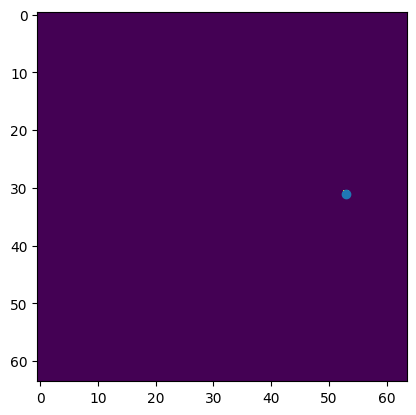

In [19]:
plt.imshow(patches_test_map[619])
plt.scatter(y= 31, x = 53)

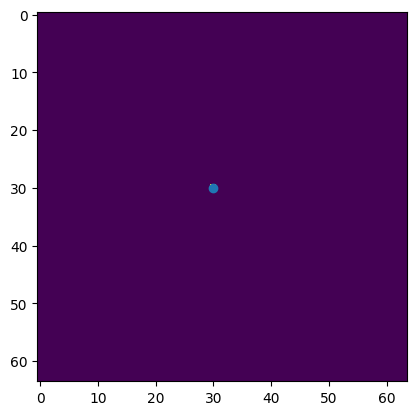

In [15]:
plt.imshow(patches_test_map[358])
plt.scatter(x=30, y=30)

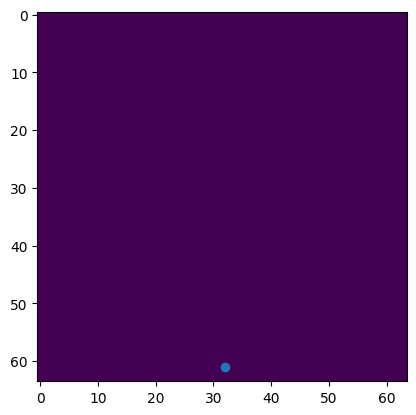

In [20]:
plt.imshow(patches_test_map[294])
plt.scatter(y=61, x=32)